## やること
* Lineage別に大陸ごとに色付けして月別にプロット
    * Lineage別に国ごとに色付けして月別にプロット
* 大陸別にLineageごとに色付けして月別にプロット
    * 国別に国ごとに色付けして月別にプロット

In [1]:
import sys
import pickle
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import time
from pathlib import Path
from sklearn.preprocessing import LabelEncoder
import copy
from tqdm import tqdm

from collections import defaultdict

from datareading.blsom import blsom_all_plot, targets, rgb_color, blsom_plot_3d, weight_file2df
from cluster_definition.cluster_definer import ClasterDefiner
from datareading.omicron import CreateOmicronHeaderDF, ShowImage, blsom_outfile_to_df

import warnings
warnings.simplefilter('ignore')
plt.rcParams["font.family"] = "Times New Roman"

DATA_COLUMNS = ["year", "month", "day"]
CLADE_COLUMNS = ["clade", "head2"]

JAPAN_HEADER_COLUMNS = ["head", "ID", "date"]
DELTA_HEADER_COLUMNS = ["head", "collection date", "submission date"]

ALL_DATA_HEADER_COLUMNS = [
    "head",
    "id",
    "continent",
    "country",
    "city",
    "host",
    "clade_head",
    "collection date",
]

# pd.set_option('display.max_columns', 50)


#行数
# pd.set_option("display.max_rows")

# Delta型Header

In [3]:
COMPARE_PASSED = False
DATA_DIR = "omicron2201"
# file = f"{DATA_DIR}/ReceivedData/dataToFurukawa/Omicron.meta.id.fas.N1.id.meta"
# filename = f"{DATA_DIR}/ReceivedData/SOM/out_each_region"

file = f"{DATA_DIR}/ReceivedData/dataToFurukawa/Omicron.meta.id.fas.N1.id.meta"
filename = f"{DATA_DIR}/ReceivedData/SOM/out_all"

createdf = CreateOmicronHeaderDF(
    out_filename=filename,
    meta_filename=file,
    # weight_file=f"{DATA_DIR}/ReceivedData/dataToFurukawa/weight.100",
    # weight_file=f"{DATA_DIR}/ReceivedData/dataToFurukawa/weight.100",
)
createdf.create_df()

delta_blsom = createdf.delta_blsom
X = createdf.X
Y = createdf.Y

if COMPARE_PASSED:
    ShowImage(delta_blsom, X, Y).show_color_by_continent()
    new_lin_file = f"{DATA_DIR}/ReceivedData/dataToFurukawa/Omicron.meta.id.fas.N1.lin"

    new_delta_header = pd.read_csv(new_lin_file, sep="\t")
    new_delta_header = new_delta_header.rename(columns={"lineage": "new_lineage"})

    delta_blsom1 = delta_blsom.merge(
        new_delta_header[["taxon", "new_lineage"]],
        right_on="taxon",
        left_on="Virus name",
        how="left",
    )
print(X, Y)

800 254


In [4]:
delta_blsom.head(5) # 248574

,Virus name,x y,distance,x,y,Type,Accession ID,Collection date,Location,Additional location information,...,GC-Content,year,month,day,continent,country,city,3,4,5
0,hCoV-19/Australia/ACT3126/2022,303 143,0.0573,303,143,betacoronavirus,EPI_ISL_10010236,2022-01-25,Oceania / Australia / Australian Capital Terri...,NaN,...,0.379635,2022,01,25,Oceania,Australia,Australian Capital Territory,None,None,None
1,hCoV-19/Australia/ACT3112/2022,295 126,0.3549,295,126,betacoronavirus,EPI_ISL_10010227,2022-01-25,Oceania / Australia / Australian Capital Terri...,NaN,...,0.379794,2022,01,25,Oceania,Australia,Australian Capital Territory,None,None,None
2,hCoV-19/Australia/ACT3119/2022,306 131,0.1606,306,131,betacoronavirus,EPI_ISL_10010232,2022-01-25,Oceania / Australia / Australian Capital Terri...,NaN,...,0.379585,2022,01,25,Oceania,Australia,Australian Capital Territory,None,None,None
3,hCoV-19/Australia/ACT3103/2022,300 137,0.1511,300,137,betacoronavirus,EPI_ISL_10010220,2022-01-25,Oceania / Australia / Australian Capital Terri...,NaN,...,0.379467,2022,01,25,Oceania,Australia,Australian Capital Territory,None,None,None
4,hCoV-19/Australia/ACT3090/2022,307 142,0.1020,307,142,betacoronavirus,EPI_ISL_10010208,2022-01-25,Oceania / Australia / Australian Capital Terri...,NaN,...,0.379702,2022,01,25,Oceania,Australia,Australian Capital Territory,None,None,None


In [5]:
# delta_blsom1

In [6]:
# delta_blsom.to_csv("ANALYTICS_CLUSTER/ALL.tsv", sep="\t", index=False)

In [7]:
# delta_blsom["Type"].value_counts()
# delta_blsom["Location"].value_counts()
# delta_blsom["Host"].value_counts()
# delta_blsom["Pango lineage"].value_counts()
# delta_blsom["Patient age"].value_counts()
# delta_blsom["Gender"].value_counts()
# delta_blsom["continent"].value_counts()
delta_blsom["country"].value_counts().index
# delta_blsom["Variant"].value_counts()
# delta_blsom["year"].value_counts()
# delta_blsom["month"].value_counts()
delta_blsom["lineage"].value_counts()

BA.2         746038
BA.1.1       568055
BA.1         235441
BA.2.9       123543
BA.1.15      104588
              ...  
BA.1.2           26
XF               24
XK               14
AY.39.1.4         2
AY.125.1          1
Name: lineage, Length: 109, dtype: int64

# 全体図プロット

6 ['Europe' 'Africa' 'Oceania' 'Asia' 'South_America' 'North_America']


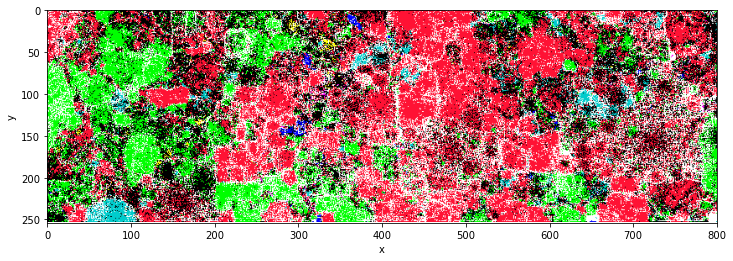

In [9]:
target="continent"
plt.figure(figsize=(12, 8))
img = blsom_all_plot(delta_blsom, rgb_color=rgb_color, target=target)
#     plt.subplot(3, 2, i+1)
#     ax = plt.gca()
#     ax.axes.xaxis.set_visible(False)
#     ax.axes.yaxis.set_visible(False)
# plt.title(f"{con}")
#     plt.title(f"{con}+{target}")
plt.xlim(0,X)
plt.ylim(Y,0)
plt.xlabel("x")
plt.ylabel("y")
plt.imshow(img)
plt.savefig(f"{DATA_DIR}/output/images/Omicron2D.png")
# plt.clf()

# 大陸別プロット

1 ['Europe']
1 ['North_America']
1 ['Oceania']
1 ['Asia']
1 ['Africa']
1 ['South_America']


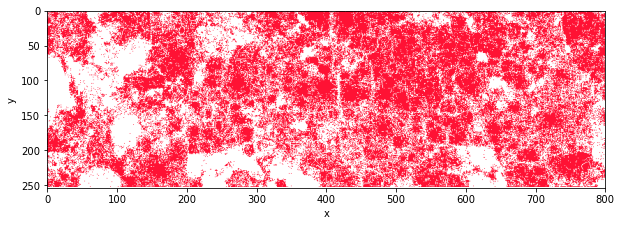

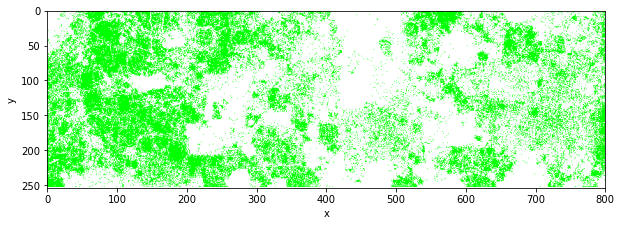

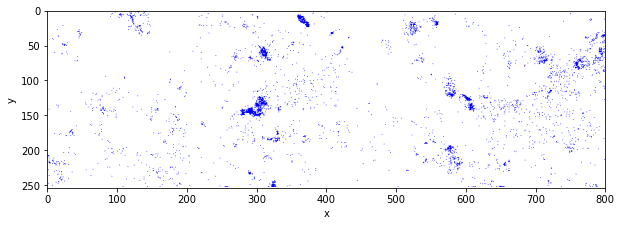

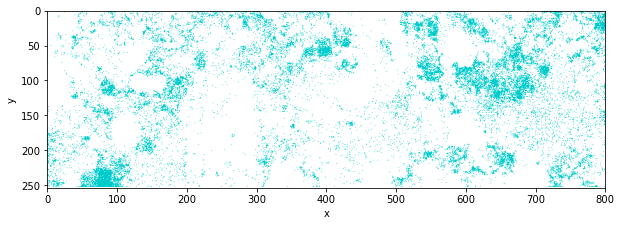

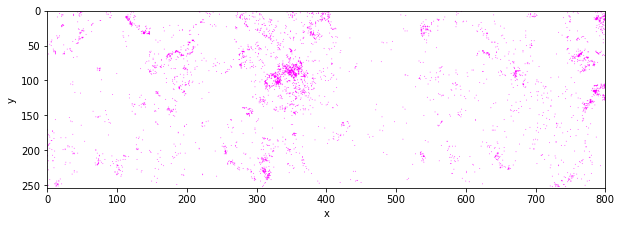

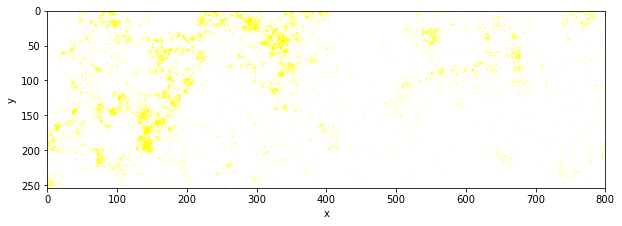

In [11]:
target="continent"
for i, con in enumerate(targets["continent"].keys()):
    plt.figure(figsize=(10, 6))
    img = blsom_all_plot(delta_blsom[delta_blsom["continent"]==con], rgb_color=rgb_color, target=target)
#     plt.subplot(3, 2, i+1)
#     ax = plt.gca()
#     ax.axes.xaxis.set_visible(False)
#     ax.axes.yaxis.set_visible(False)
#     plt.title(f"{con}")
#     plt.title(f"{con}+{target}")
    plt.xlim(0,X)
    plt.ylim(Y,0)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.imshow(img)
    plt.savefig(f"{DATA_DIR}/output/images/{con}2D.png")
#     plt.clf()

# 大陸月別プロット

1 ['Europe']
1 ['North_America']
1 ['Oceania']
1 ['Asia']
1 ['Africa']
1 ['Europe']
1 ['North_America']
1 ['Oceania']
1 ['Asia']
1 ['Africa']
1 ['Europe']
1 ['North_America']
1 ['Oceania']
1 ['Asia']
1 ['Africa']
1 ['Europe']
1 ['North_America']
1 ['Oceania']
1 ['Asia']
1 ['Africa']
1 ['Europe']
1 ['North_America']
1 ['Oceania']
1 ['Asia']
1 ['Africa']
1 ['Europe']
1 ['North_America']
1 ['Oceania']
1 ['Asia']
1 ['Africa']
1 ['Europe']
1 ['North_America']
1 ['Oceania']
1 ['Asia']


findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


1 ['Africa']


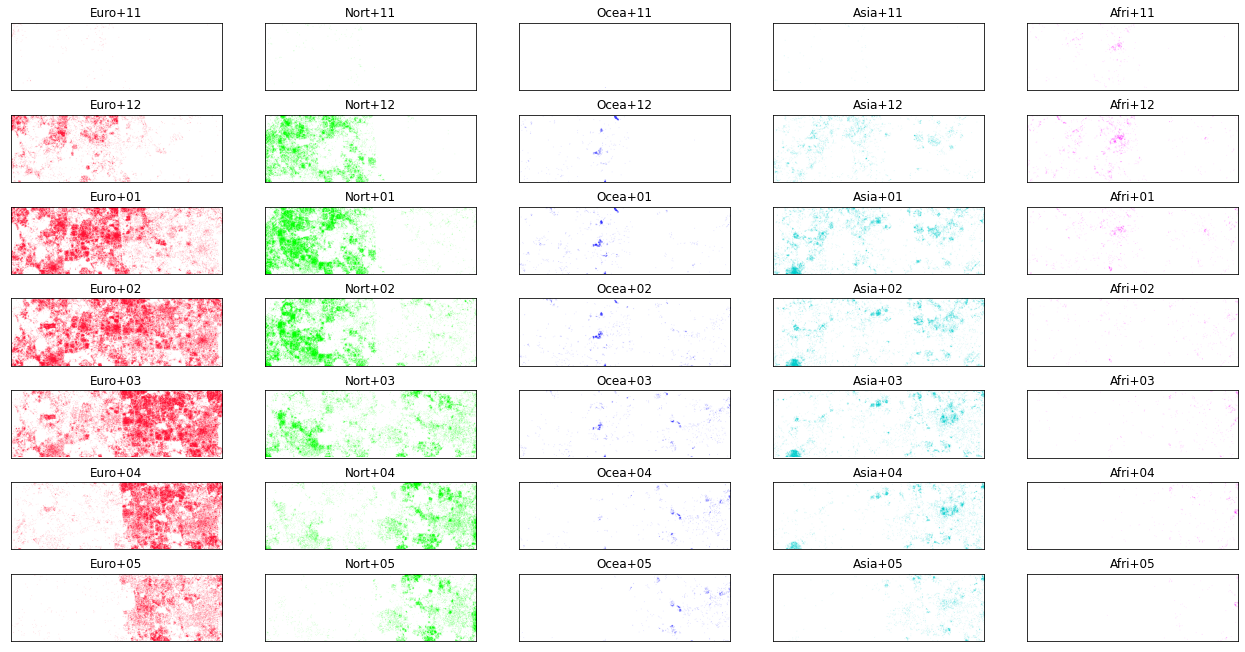

In [7]:
target="continent"
plt.figure(figsize=(22, 20))
num = 0
for j, mon in enumerate(targets["month"].keys()):
    for i, con in enumerate(targets["continent4"].keys()):
        num += 1
        img = blsom_all_plot(delta_blsom[(delta_blsom["month"]==mon) & (delta_blsom["continent"]==con)], rgb_color=rgb_color, target=target)
        plt.subplot(12, 5, num) # subplot(m, n, p): mは行, nは列, pは位置 → mは2や3だと上下離れてしまうので5にしています
        plt.title(f"{con[:4]}+{mon}")
        ax = plt.gca()
        ax.axes.xaxis.set_visible(False)
        ax.axes.yaxis.set_visible(False)
        plt.xlim(0,X)
        plt.ylim(Y,0)
        if img is not None:
            plt.imshow(img)
        else:
            plt.imshow(np.full((X+1, Y+1, 3), [255,255,255]))
plt.savefig(f"{DATA_DIR}/output/images/Omicron_month.png")

In [8]:
delta_blsom["month"].value_counts()

01    640640
02    566497
03    518902
04    300387
12    226040
05    131517
11      1408
Name: month, dtype: int64

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


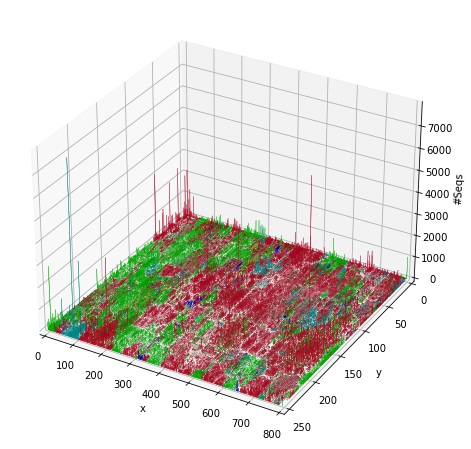

In [9]:
ShowImage(X, Y).blsom_plot_3d(delta_blsom, f"{DATA_DIR}/output/images/Omicron3D.png")

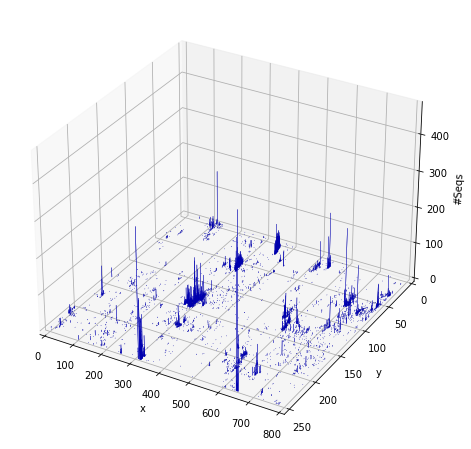

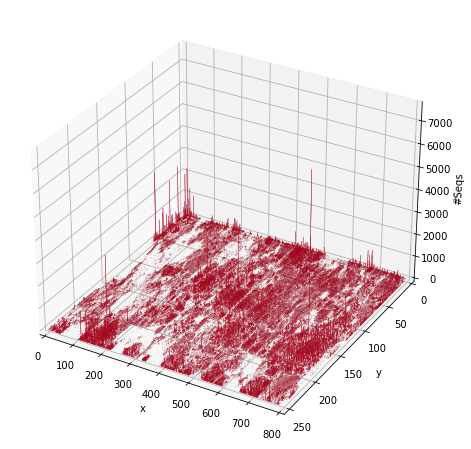

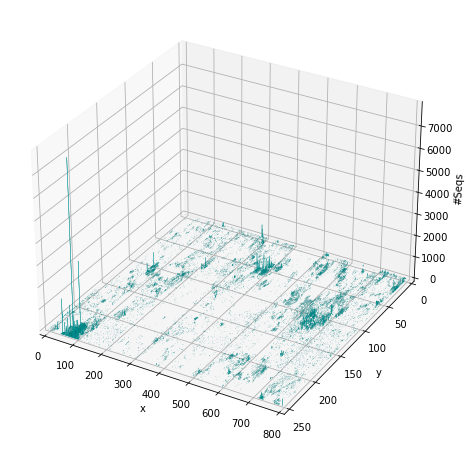

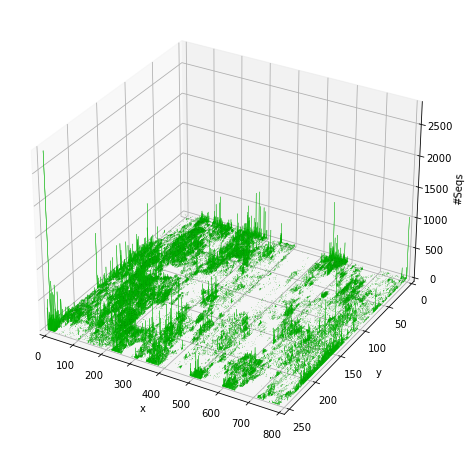

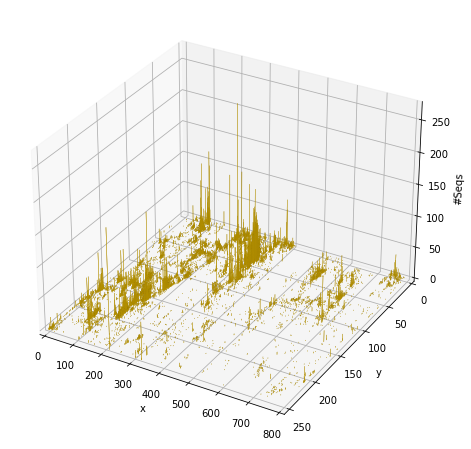

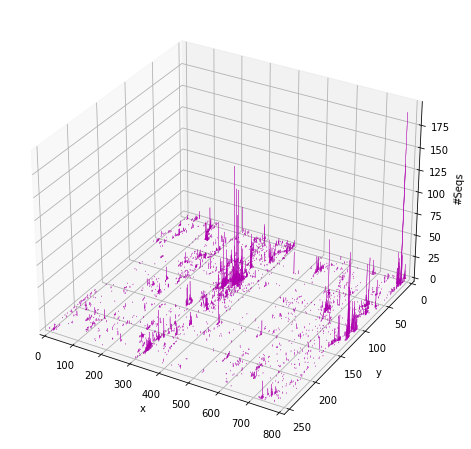

In [11]:
for i in delta_blsom["continent"].unique():
    by3d = delta_blsom[(delta_blsom["continent"] == i)]
    ShowImage(X, Y).blsom_plot_3d(by3d, f"{DATA_DIR}/output/images/{i}3D.png")